In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

chRNA_ratios = pd.read_csv("../code/QTLs/QTLTools/chRNA.IER/OnlyFirstReps.ratios.bed.gz", sep='\t')
ml30_ratios = pd.read_csv("../code/QTLs/QTLTools/MetabolicLabelled.30min.IER/OnlyFirstReps.ratios.bed.gz", sep='\t')
ml60_ratios = pd.read_csv("../code/QTLs/QTLTools/MetabolicLabelled.60min.IER/OnlyFirstReps.ratios.bed.gz", sep='\t')
polyA_ratios = pd.read_csv("../code/QTLs/QTLTools/polyA.IER/OnlyFirstReps.ratios.bed.gz", sep='\t')

In [2]:
chRNA_samples = [x for x in chRNA_ratios.columns if ((x[:2] == 'NA') and (x != 'NA18855'))]
ml30_samples = [x for x in ml30_ratios.columns if (x[:2] == 'NA')]
ml60_samples = [x for x in ml60_ratios.columns if (x[:2] == 'NA')]
polyA_samples = [x for x in polyA_ratios.columns if (x[:2] == 'NA')]

In [3]:
chRNA_X = chRNA_ratios[chRNA_samples].dropna()
ml30_X = ml30_ratios[ml30_samples].dropna()
ml60_X = ml60_ratios[ml60_samples].dropna()
polyA_X = polyA_ratios[polyA_samples].dropna()


In [4]:
def plot_cumulative(x):
    cum_sum = []
    for a in np.linspace(0, 1, 100):
        cum_sum.append(get_percent_observed(x, a))
    return cum_sum
    
def get_percent_observed(x, a):
    percent_observed = (x <= a).mean()
    return percent_observed

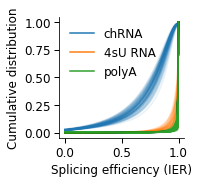

In [12]:
fig, ax = plt.subplots(figsize=(2.24, 2.24))

col_list = plt.cm.tab10(range(10))

for sample in chRNA_samples:
    ax.plot(np.linspace(0, 1, 100), plot_cumulative(chRNA_X[sample]), c=col_list[0], alpha=0.1)
    
for sample in ml30_samples:
    ax.plot(np.linspace(0, 1, 100), plot_cumulative(ml30_X[sample]), c=col_list[1], alpha=0.1)
    
# for sample in ml30_samples:
#     ax.plot(np.linspace(0, 1, 100), plot_cumulative(ml30_X[sample]), c=col_list[1], alpha=0.2)
    
for sample in polyA_samples:
    ax.plot(np.linspace(0, 1, 100), plot_cumulative(polyA_X[sample]), c=col_list[2], alpha=0.1)


xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.plot([-1], [0], c=col_list[0], label='chRNA')
ax.plot([-1], [-1], c=col_list[1], label='4sU RNA')
ax.plot([-1], [-1], c=col_list[2], label='polyA')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(length=5, labelsize=12, width=1)


# ax.set_ylabel('cumulative distribution',size=12)
# ax.set_xlabel('splicing efficiency',size=12)

ax.legend(frameon=False, fontsize=12)
    
ax.set_xlabel('Splicing efficiency (IER)', size=12)
ax.set_ylabel('Cumulative distribution', size=12)

# ax.spines['left'].set_linewidth(1)
# ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

figdir = '/project2/yangili1/carlos_and_ben_shared/polished_plots/'

plt.savefig(figdir + 'Supp.SplicingEfficiency.pdf', dpi=300, bbox_inches='tight')
plt.savefig(figdir + 'Supp.SplicingEfficiency.png', dpi=300, bbox_inches='tight')

In [9]:
ax.get_xlim()

(-0.05, 1.05)

In [103]:
slopes = pd.read_csv('../code/IntronSlopes/IntronWindowCounts/NA18486.IntronWindows.bed.gz', sep='\t',
                     names = ['chrom', 'start', 'end', 'bin_name', 'score', 'strand', 'counts'])

In [104]:
slopes[['gene', 'intron']] = slopes.bin_name.str.split('_', 1, expand=True)
slopes[['intron_chr', 'intron_start', 'intron_end', 'intron_strand', 'bin_count']] = slopes.intron.str.split('_', expand=True)
slopes['intron_id'] = slopes.intron_chr + '_' + slopes.intron_start + '_' + slopes.intron_end + '_' + slopes.intron_strand
slopes['intron_len'] = slopes.intron_end.astype(int) - slopes.intron_start.astype(int)
slopes_to_keep = slopes.groupby('intron_id').counts.sum().loc[slopes.groupby('intron_id').counts.sum() > 100].index
slopes = slopes.loc[slopes.intron_id.isin(slopes_to_keep)]

In [110]:
q1 = slopes.intron_len.quantile(0.25)
q2 = slopes.intron_len.median()
q3 = slopes.intron_len.quantile(0.75)

In [111]:
q1_slope = np.array(slopes.loc[(slopes.intron_len < q1)].groupby('bin_count').counts.mean().loc[[str(i) for i in range(2, 99)]])

q2_slope = np.array(slopes.loc[(slopes.intron_len < q2) & (slopes.intron_len >= q1)
                              ].groupby('bin_count').counts.mean().loc[[str(i) for i in range(2, 99)]])

q3_slope = np.array(slopes.loc[(slopes.intron_len < q3) & (slopes.intron_len >= q2)
                              ].groupby('bin_count').counts.mean().loc[[str(i) for i in range(2, 99)]])

q4_slope = np.array(slopes.loc[(slopes.intron_len >= q3)
                              ].groupby('bin_count').counts.mean().loc[[str(i) for i in range(2, 99)]])

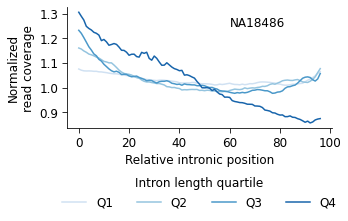

In [143]:
plt.rcParams['legend.title_fontsize'] = 12

colores = sns.color_palette("Blues", 4)
figsize = (4.76, 2.24)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, gridspec_kw={'hspace': 0.2})

ax.plot(100*q1_slope/np.sum(q1_slope), c=colores[0], label='Q1')
ax.plot(100*q2_slope/np.sum(q2_slope), c=colores[1], label='Q2')
ax.plot(100*q3_slope/np.sum(q3_slope), c=colores[2], label='Q3')
ax.plot(100*q4_slope/np.sum(q4_slope), c=colores[3], label='Q4')

ax.tick_params(length=5, labelsize=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.75), frameon=False, title='Intron length quartile', fontsize=12, ncol=4)

ax.set_xlabel('Relative intronic position', size=12)
ax.set_ylabel('Normalized\nread coverage', size=12)

ax.text(60, 1.25, 'NA18486', size=12)

plt.savefig(figdir + 'Supp.IntronSlopes.pdf', dpi=300, bbox_inches='tight')
plt.savefig(figdir + 'Supp.IntronSlopes.png', dpi=300, bbox_inches='tight')